# 9과 [예제] 범주 vs 범주

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 보스톤 시, 타운별 집값  
③ 아이리스 꽃 분류
④ 뉴욕 공기 오염도


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
titanic.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Age_20,2,0,7.2500
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C,Age_30,2,0,71.2833
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Age_20,1,0,7.9250
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,S,Age_30,2,0,53.1000
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,S,Age_30,1,0,8.0500


In [3]:
# 아이리스 꽃 분류
iris = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/iris.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston2_NA.csv')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0.0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.0


In [5]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday
0,41,190.0,7.4,67,1973-05-01,5,1
1,36,118.0,8.0,72,1973-05-02,5,2
2,12,149.0,12.6,74,1973-05-03,5,3
3,18,313.0,11.5,62,1973-05-04,5,4
4,19,NaN,14.3,56,1973-05-05,5,5


## 2.교차표(pd.crosstab)

Pandas의 교차표 함수 : pd.crosstab( 행(index), 열, normalize = )
* Normalize 옵션을 사용해 봅시다.
    * columns : 열 기준 100%
    * index : 행 기준 100%
    * all : 전체 기준 100%

* 1) 그냥 집계하기

In [6]:
# 행 : Survived, 열 : Sex
pd.crosstab(titanic['Survived'], titanic['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [7]:
# 행 : Sex, 열 : Survived
pd.crosstab(titanic['Sex'], titanic['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


* 2) normalize : 열 기준 100%
    * normalize='columns'

In [8]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize='columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


* 3) nomalize : 행 기준 100%
    * normalize='index'

In [9]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


* 4) nomalize : 전체 기준 100%
    * normalize='all'

In [10]:
pd.crosstab(titanic['Survived'], titanic['Sex'], normalize = 'all')

Sex,female,male
Survived,,
0,0.090909,0.525253
1,0.261504,0.122334


## 3.시각화 : bar chart, mosaic

* 100% Stacked bar chart

In [11]:
# Pclass --> Survived 

# 1) 우선 집계부터
# 100% stacked bar chart를 위해서는 그런데 꼭 아래와 같이 해야 합니다.
# pd.crosstab( x, y, normarlize = 'index')
temp = pd.crosstab(titanic['Pclass'], titanic['Survived'], normalize = 'index')
print(temp)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


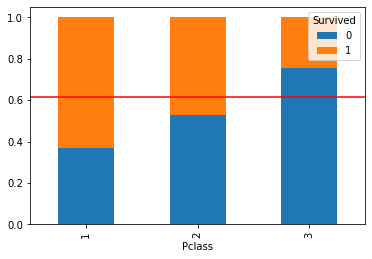

In [12]:
# 2) stacked bar!
temp.plot.bar(stacked=True)

# 평균선 추가.
plt.axhline(1-titanic['Survived'].mean(), color = 'r')
plt.show()

* mosaic plot

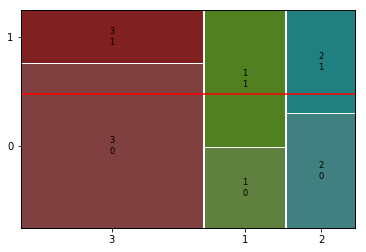

In [13]:
# mosaic( dataframe, [ x, y ])
# 별도 집계단계가 필요하지 않습니다.

mosaic(titanic, [ 'Pclass','Survived'])

# 평균선 추가
plt.axhline(1- titanic['Survived'].mean(), color = 'r')
plt.show()

### 실습 : 아래 관계에 대해서 교차표와 시각화를 수행해 봅시다.

* Embarked --> Survived

* (참조) 모자익플롯을 세 범주로 그리려면...

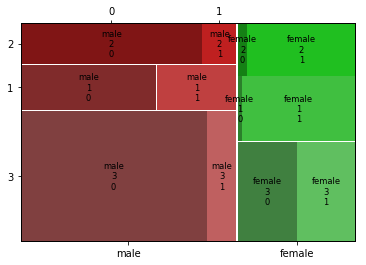

In [11]:
mosaic(titanic, ['Sex','Pclass','Survived'])
plt.show()

## 4.수치화 : 카이제곱검정

* 카이제곱검정

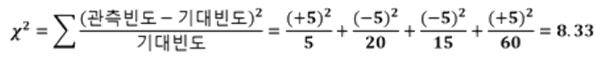

* 타이타닉 데이터에서 객실등급과 생존여부 간의 카이제곱 검정을 수행해 봅시다.

In [14]:
pd.crosstab(titanic['Survived'], titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [15]:
# 먼저 집계
table = pd.crosstab(titanic['Survived'], titanic['Pclass'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------------------------------------------------------------------------------------
카이제곱통계량 102.88898875696056
p-value 4.549251711298793e-23
기대빈도
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


In [16]:
result

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

### 실습
다음의 범주형 변수들에 대해서 관계를 살펴봅시다.

* Embarked --> Survived

In [24]:
table1 = pd.crosstab(titanic['Survived'],titanic['Embarked'])
table1

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


In [25]:
result1 = spst.chi2_contingency(table1)
result1

(25.964452881874784,
 2.3008626481449577e-06,
 2,
 array([[103.51515152,  47.44444444, 398.04040404],
        [ 64.48484848,  29.55555556, 247.95959596]]))

In [26]:
print('카이제곱통제량 :',result1[0])
print('p-값 :',result1[1])
print('기대빈도\n',result1[3])

카이제곱통제량 : 25.964452881874784
p-값 : 2.3008626481449577e-06
기대빈도
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


* (참조) 여러 변수들에 대해서 한꺼번에 검정 수행

이럴때 for loop!

In [27]:
vars = ['Pclass','Sex','Embarked','Title']

for v in vars :
    table = pd.crosstab(titanic['Survived'], titanic[v])
    result = spst.chi2_contingency(table, correction=False)
    print(v)
    print("카이제곱통계량 : {:.4f}".format(result[0]))
    print("p-value : {:.20f}".format(result[1]))
    print('--------------------------------------')


Pclass
카이제곱통계량 : 102.8890
p-value : 0.00000000000000000000
--------------------------------------
Sex
카이제곱통계량 : 263.0506
p-value : 0.00000000000000000000
--------------------------------------
Embarked
카이제곱통계량 : 25.9645
p-value : 0.00000230086264814496
--------------------------------------
Title
카이제곱통계량 : 289.1953
p-value : 0.00000000000000000000
--------------------------------------
